In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
labeled_images = pd.read_csv('train.csv')
print('read train.csv')
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)

read train.csv


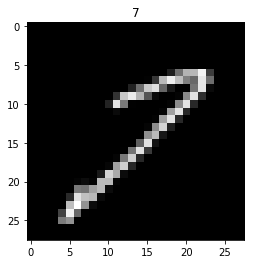

In [3]:
i=28000
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100))
print('starting model fitting')
clf.fit(train_images, train_labels.values.ravel())
print('fitting of model done')
clf.score(test_images,test_labels)


starting model fitting
fitting of model done


0.9447619047619048

In [5]:
test_images[test_images > 0] = 1
train_images[train_images>0] = 1

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2454: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

starting test read
read test data


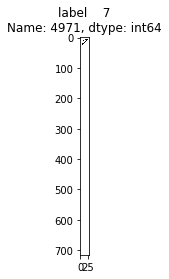

In [6]:
img=train_images.iloc[i].as_matrix().reshape((28,28))
plt.imshow(img,cmap='binary')
plt.title(train_labels.iloc[i])
plt.hist(train_images.iloc[i])

print('starting test read')
test_data=pd.read_csv('test.csv')
print('read test data')
test_data[test_data>0]=1
results=clf.predict(test_data[:])

In [7]:
print('starting to write')
df = pd.DataFrame(results)
df.index.name = 'ImageId'
df.index += 1
df.columns = ['Label']
df.to_csv('results.csv', header=True)

starting to write
